_______________________________________________________________________________
# **Progetto Data Mining**

# About Dataset

## Content
Questo dataset contiene circa 10 anni di osservazioni meteo gornaliere da tutta l'Australia. Contiene in particolare dati sulle giornate di pioggia e di sole di tutto il paese. Contiene 23 colonne.

* Date: la data dell'osservazione
* Location: il luogo della stazione meteo
* MinTemp: temperatura minima
* MaxTemp: temperatura massima
* Rainfall: il quantitativo di pioggia caduta registrata in mm
* Evaporation: Dato sull'evaporazione in mm
* Sunshine: Numero di ore di luce nel giorno
* WindGustDir: Direzione della folata di vento più forte
* WindGustSpeed: Velocità della folata di vento più forte
* WindGust3Dir: Direzione del vento alle 3
* WindGust9Dir: Direzione del vento alle 9
* WindSpeed9am: Velocità del vento alle 9
* WindSpeed3am: Velocità del vento alle 3
* Humidity3pm: Umidità alle 3
* Humidity9pm: Umidità alle 9
* Pressure9am: Pressione atmosferica alle 9
* Pressure3pm: Pressione atmosferica alle 3
* Cloud9am: Porzione di cielo oscurata dalle nuvole calcolata in "oktas" alle 9
* Cloud3pm:Porzione di cielo oscurata dalle nuvole calcolata in "oktas" alle 3
* Temp9am: Temperatura alle 9
* Temp3pm: Temperatura alle 3
* RainToday: Boolean: 1 se pioverà oggi con una quantità maggiore a 1mm di acqua, 0 altrimenti
* RainTomorrow: Boolean: 1 se pioverà domani con una quantità maggiore a 1mm di acqua, 0 altrimenti

L'obbiettivo del progetto consiste nel fare predizione sulla colonna 'RainTomorrow'

In [111]:
from pandas import DataFrame, Series
from io import StringIO
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import Image
import seaborn as sb
import statistics as stat
import time
import math
from sklearn.metrics import *
from sklearn.metrics import *
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [112]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE


In [113]:
def describe(a):
    if type(a) is np.ndarray:
        print("data:\n{}\nshape:{}\ndtype:{}\ntype: {}".format(a, a.shape, a.dtype, type(a)))
    elif type(a) is pd.Series:
        print("data:\n{}\nshape:{}\ndtype:{}\nname:{}\nindex-name:{}\ntype:{}".format(a, a.shape, a.dtype, a.name, a.index.name, type(a)))
    elif type(a) is pd.DataFrame:
        print("data:\n{}\nshape:{}\ntype:{}".format(a, a.shape,type(a)))
    else:
        print("{}, type:{}".format(a, type(a)))

# Informazioni di base e data visualization

In [8]:
dataFrameWeather = pd.read_csv('./content/drive/MyDrive/weatherAUS.csv')

In [9]:
dataFrameWeather.shape

(145460, 23)

In [10]:
dataFrameWeather.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [11]:
dataFrameWeather.duplicated().value_counts()

False    145460
dtype: int64

In [12]:
dataFrameWeather.sample(frac=1).head(30)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
59197,2011-11-21,Bendigo,5.1,23.1,0.0,NaN,NaN,WNW,31.0,WSW,...,55.0,32.0,1018.9,1014.9,2.0,6.0,14.0,20.9,No,No
54964,2017-02-08,MountGinini,9.2,15.0,0.0,NaN,NaN,E,54.0,E,...,97.0,98.0,NaN,NaN,NaN,NaN,11.1,13.8,No,No
27851,2010-11-16,Richmond,18.5,26.4,26.8,1.2,NaN,E,37.0,E,...,87.0,48.0,1013.4,1010.1,NaN,NaN,19.5,25.4,Yes,No
103987,2013-03-04,Nuriootpa,19.2,32.5,0.0,9.6,11.0,NE,41.0,NE,...,50.0,27.0,1015.4,1012.8,1.0,6.0,23.4,31.8,No,No
83918,2017-03-29,Dartmoor,13.0,22.4,0.0,NaN,NaN,SW,69.0,N,...,94.0,94.0,1007.8,1007.8,NaN,NaN,14.5,12.3,No,Yes
54287,2015-04-03,MountGinini,5.8,13.5,0.0,NaN,NaN,ENE,26.0,N,...,98.0,96.0,NaN,NaN,NaN,NaN,7.5,10.1,No,No
89777,2016-03-20,Cairns,22.8,32.9,0.0,5.2,10.3,ENE,28.0,W,...,76.0,63.0,1009.9,1006.0,8.0,8.0,27.9,32.4,No,No
144183,2013-12-27,Uluru,19.5,40.5,0.0,NaN,NaN,NE,35.0,NNW,...,28.0,12.0,1009.9,1005.0,NaN,NaN,30.9,39.3,No,No
55533,2010-02-05,Ballarat,13.1,21.5,5.4,NaN,NaN,SSE,52.0,S,...,90.0,49.0,1014.4,1014.8,7.0,5.0,13.9,20.1,Yes,No
19955,2014-04-19,NorahHead,16.3,21.7,0.0,NaN,NaN,S,43.0,SSW,...,72.0,66.0,1016.3,1014.3,NaN,NaN,19.9,19.7,No,No


In [13]:
dataFrameWeather.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Come possiamo notare il dataframe non presenta dati duplicati ma presenta molti dati NaN che andranno gestiti. SI inizia trattando i valori di temperatura minima e massima. Questi possono essere semplicemente essere riempiti con i dati di temperatura media della rispettiva colonna in quanto non presentano un elevato numero di tuple nulle.

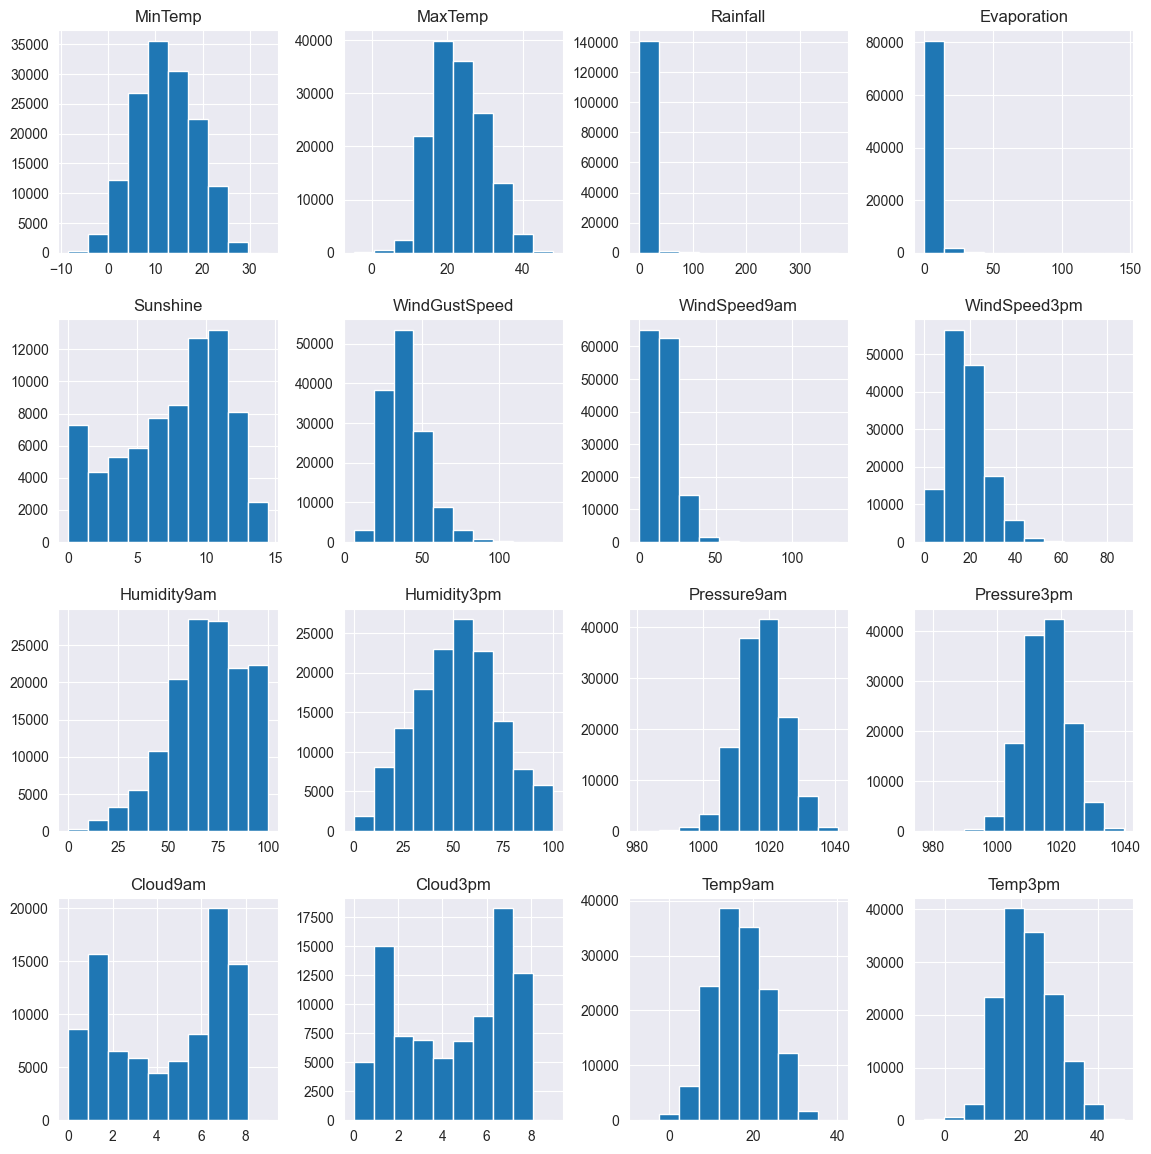

In [14]:
import warnings
warnings.filterwarnings('ignore')
fig, ax = plt.subplots(figsize=(10, 10))
dataFrameWeather.hist(ax=ax)
plt.subplots_adjust(right=1.2, top=1.2)
plt.show()

# Data cleaning e Pre-processing

Inizio con il riempimento dei dati nan. Parto con 'MinTemp' e 'MaxTemp'. Essendo pochi i dati mancanti, essi verranno sostituiti con la temperatura media di ciascuna colonna.

In [15]:
mean_MinTemp = dataFrameWeather['MinTemp'].mean()
mean_MaxTemp = dataFrameWeather['MaxTemp'].mean()

dataFrameWeather['MinTemp'].fillna(mean_MinTemp, inplace=True)
dataFrameWeather['MaxTemp'].fillna(mean_MaxTemp, inplace=True)

In [16]:
dataFrameWeather.isna().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Andiamo ora a gestire il dato Rainfall. Esso indica se la quantità di acqua caduta in un giorno 'RainToday' = 'Yes' se e solo se la quantità di acqua caduta è strettamente maggiore di 1mm di acqua.

Si decide di droppare le tuple che contengono valori NaN in quanto la correzione richiederebbe troppo tempo per essere implementata visto il numero esiguo di tuple

Si decide di droppare le colonne 'WindDir3pm' and 'WindDir9pm' perchè risultano essere irrilevanti ed essere una specifica di una colonna già esistente. Stessa cosa con 'WindSpeed9am', 'WinSpeed3pm'

In [17]:
dataFrameWeather = dataFrameWeather.drop(columns=['WindDir3pm', 'WindDir9am', 'WindSpeed3pm', 'WindSpeed9am'], axis=1)
dataFrameWeather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   Humidity9am    142806 non-null  float64
 10  Humidity3pm    140953 non-null  float64
 11  Pressure9am    130395 non-null  float64
 12  Pressure3pm    130432 non-null  float64
 13  Cloud9am       89572 non-null   float64
 14  Cloud3pm       86102 non-null   float64
 15  Temp9am        143693 non-null  float64
 16  Temp3pm        141851 non-null  float64
 17  RainToday      142199 non-nul

Posso, inoltre, droppare le tuple mancanti nella colonna 'RainTomorrow' essendo di un numero molto esiguo ed essendo questo il parametro che vogliamo andare a predire

In [18]:
dataFrameWeather.dropna(subset='Rainfall', inplace=True)
dataFrameWeather.isna().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation      60488
Sunshine         67820
WindGustDir       9725
WindGustSpeed     9665
Humidity9am       1554
Humidity3pm       3630
Pressure9am      13940
Pressure3pm      13993
Cloud9am         53331
Cloud3pm         56874
Temp9am            685
Temp3pm           2746
RainToday            0
RainTomorrow      1412
dtype: int64

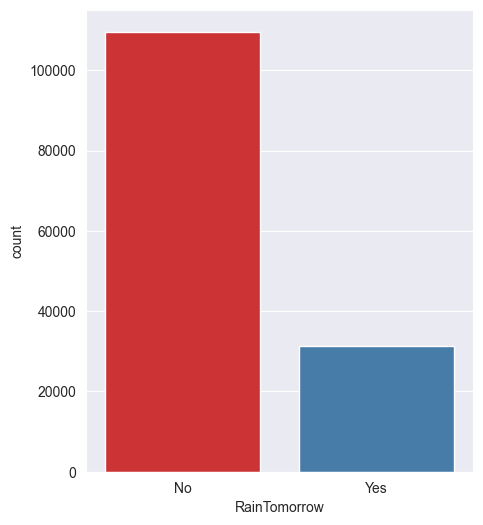

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140787 non-null  float64
 3   MaxTemp        140787 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   Humidity9am    139270 non-null  float64
 10  Humidity3pm    137286 non-null  float64
 11  Pressure9am    127044 non-null  float64
 12  Pressure3pm    127018 non-null  float64
 13  Cloud9am       88162 non-null   float64
 14  Cloud3pm       84693 non-null   float64
 15  Temp9am        140131 non-null  float64
 16  Temp3pm        138163 non-null  float64
 17  RainToday      140787 non-nul

In [19]:
dataFrameWeather.dropna(subset='RainTomorrow', inplace=True)
plt.figure(figsize=(5,6))
ax = sb.countplot(x='RainTomorrow', data=dataFrameWeather, palette="Set1")
plt.show()
dataFrameWeather.info()

Si continua con la sostituizione ai valori nan delle colonne 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm'. Qui si andrà ad effettuare una group-by sull'attributo 'RainToday', così da poter differenziare la media calcolata per giorni in cui piove e per giorni in cui non piove.

In [20]:
average_humidity = dataFrameWeather.groupby('RainToday')['Humidity9am'].transform('mean')
average_humidity2 = dataFrameWeather.groupby('RainToday')['Humidity3pm'].transform('mean')
average_temp = dataFrameWeather.groupby('RainToday')['Temp9am'].transform('mean')
average_temp2 = dataFrameWeather.groupby('RainToday')['Temp3pm'].transform('mean')
dataFrameWeather['Humidity9am'].fillna(average_humidity, inplace=True)
dataFrameWeather['Humidity3pm'].fillna(average_humidity2, inplace=True)
dataFrameWeather['Temp9am'].fillna(average_temp, inplace=True)
dataFrameWeather['Temp3pm'].fillna(average_temp2, inplace=True)

In [21]:
dataFrameWeather.isna().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustDir       9163
WindGustSpeed     9105
Humidity9am          0
Humidity3pm          0
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow         0
dtype: int64

Text(0, 0.5, 'RainTomorrow')

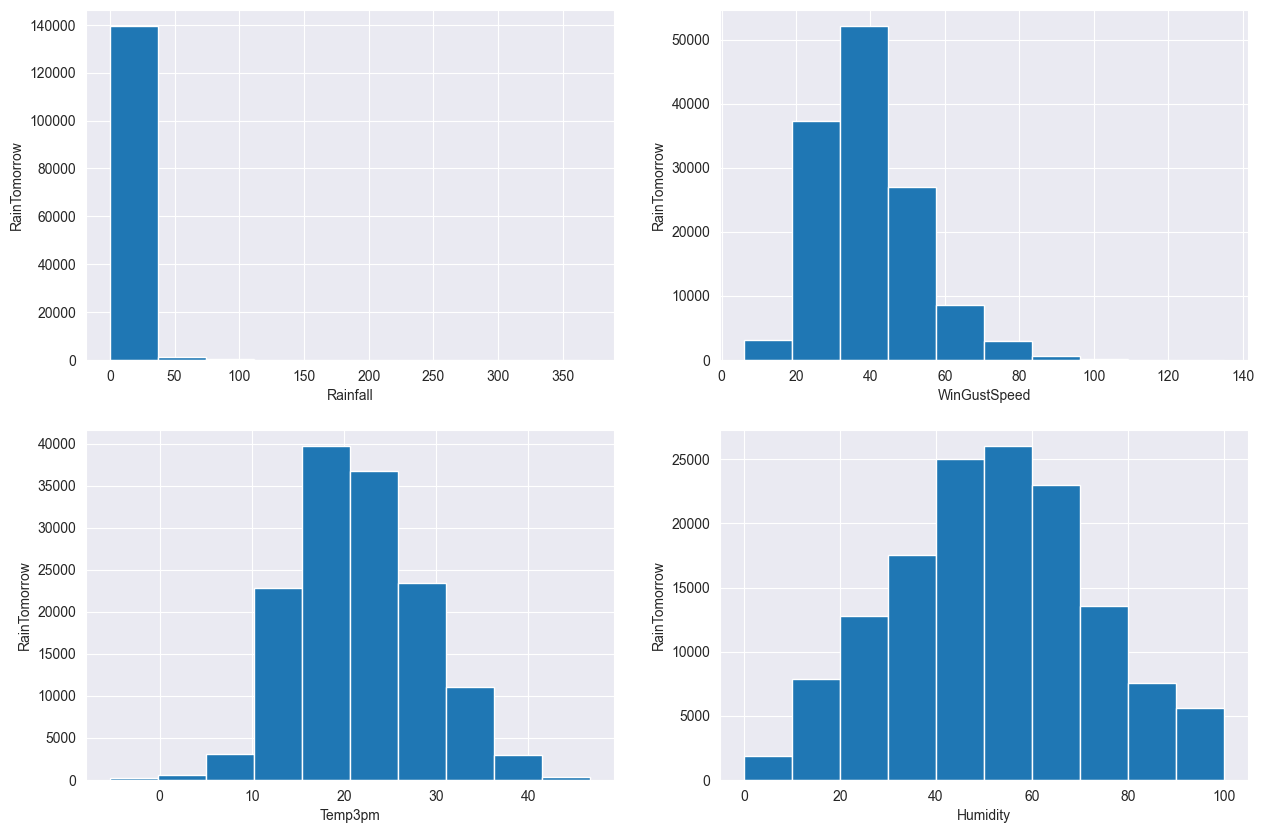

In [22]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = dataFrameWeather.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')

plt.subplot(2, 2, 2)
fig = dataFrameWeather.WindGustSpeed.hist(bins=10)
fig.set_xlabel('WinGustSpeed')
fig.set_ylabel('RainTomorrow')

plt.subplot(2, 2, 3)
fig = dataFrameWeather.Temp3pm.hist(bins=10)
fig.set_xlabel('Temp3pm')
fig.set_ylabel('RainTomorrow')

plt.subplot(2, 2, 4)
fig = dataFrameWeather.Humidity3pm.hist(bins=10)
fig.set_xlabel('Humidity')
fig.set_ylabel('RainTomorrow')

Si decide di droppare le colonne Evaporation e Sunshine in quanto sono quelle con la più bassa correlazione con gli altri attributi

In [23]:
dataFrameWeather = dataFrameWeather.drop(columns=['Sunshine'], axis=1)
dataFrameWeather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140787 non-null  float64
 3   MaxTemp        140787 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   WindGustDir    131624 non-null  object 
 7   WindGustSpeed  131682 non-null  float64
 8   Humidity9am    140787 non-null  float64
 9   Humidity3pm    140787 non-null  float64
 10  Pressure9am    127044 non-null  float64
 11  Pressure3pm    127018 non-null  float64
 12  Cloud9am       88162 non-null   float64
 13  Cloud3pm       84693 non-null   float64
 14  Temp9am        140787 non-null  float64
 15  Temp3pm        140787 non-null  float64
 16  RainToday      140787 non-null  object 
 17  RainTomorrow   140787 non-nul

In [24]:
dataFrameWeather.isna().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation      59694
WindGustDir       9163
WindGustSpeed     9105
Humidity9am          0
Humidity3pm          0
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow         0
dtype: int64

Trasformo, a questo punto, la data dal formato gg-mm-aaaa in tre colonne diverse contenenti il giorno, il mese e l'anno. Questa soluzione sarà utile in seguito per fare imputation

In [25]:
df_copy = dataFrameWeather.copy()
# Aggiungo la colonna "month" al dataframe
df_copy['day'] = df_copy.Date.str.split("-", expand = True)[0]
df_copy['month'] = df_copy.Date.str.split("-", expand = True)[1]
# Aggiungo la colonna "year" al dataframe
df_copy['year'] = df_copy.Date.str.split("-", expand = True)[2]
df_copy = df_copy.drop(columns='Date', axis=1)

In [26]:
df_copy.isna().sum()

Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation      59694
WindGustDir       9163
WindGustSpeed     9105
Humidity9am          0
Humidity3pm          0
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow         0
day                  0
month                0
year                 0
dtype: int64

In [27]:
df_num = df_copy.select_dtypes(include=[np.number])
df_cat = df_copy.select_dtypes(include=['object'])

Uso un encoder per trasformare i dati categorici in dati numerici automaticamente

In [28]:
#df_encoded = pd.concat([df_cat, df_num], axis=1)
for attr in df_cat.columns:
    df_cat[attr] = LabelEncoder().fit_transform(df_cat[attr])
df_encoded = pd.concat([df_cat, df_num], axis = 1)
df_encoded.head()

,Location,WindGustDir,RainToday,RainTomorrow,day,month,year,MinTemp,MaxTemp,Rainfall,Evaporation,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2,13,0,0,1,11,0,13.4,22.9,0.6,NaN,44.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,2,14,0,0,1,11,1,7.4,25.1,0.0,NaN,44.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,2,15,0,0,1,11,2,12.9,25.7,0.0,NaN,46.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,2,4,0,0,1,11,3,9.2,28.0,0.0,NaN,24.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,2,13,0,0,1,11,4,17.5,32.3,1.0,NaN,41.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


Data l'elevato numero di tuple nan rimanenti nelle colonne si è deciso di utilizzare un **imputer**. Un **imputer** è una tecnica utilizzata nella fase di preprocessing dei dati per gestire i valori mancanti in un dataset. L'imputer viene utilizzato per riempire i valori mancanti con valori appropriati in base alle caratteristiche dei dati.

In [29]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       140787 non-null  int32  
 1   WindGustDir    140787 non-null  int32  
 2   RainToday      140787 non-null  int32  
 3   RainTomorrow   140787 non-null  int32  
 4   day            140787 non-null  int32  
 5   month          140787 non-null  int32  
 6   year           140787 non-null  int32  
 7   MinTemp        140787 non-null  float64
 8   MaxTemp        140787 non-null  float64
 9   Rainfall       140787 non-null  float64
 10  Evaporation    81093 non-null   float64
 11  WindGustSpeed  131682 non-null  float64
 12  Humidity9am    140787 non-null  float64
 13  Humidity3pm    140787 non-null  float64
 14  Pressure9am    127044 non-null  float64
 15  Pressure3pm    127018 non-null  float64
 16  Cloud9am       88162 non-null   float64
 17  Cloud3pm       84693 non-null

In [30]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()
df_imputed = df_encoded.copy()
df_imputed = imputer.fit_transform(df_imputed) #imputation dei valori mancanti
df_imputed = pd.DataFrame(df_imputed, columns=df_encoded.columns) #conversione in dataframe pandas
df_imputed.head(100)

,Location,WindGustDir,RainToday,RainTomorrow,day,month,year,MinTemp,MaxTemp,Rainfall,Evaporation,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2.0,13.0,0.0,0.0,1.0,11.0,0.0,13.4,22.9,0.6,5.978670,44.0,71.0,22.0,1007.7,1007.1,8.000000,5.039727,16.9,21.8
1,2.0,14.0,0.0,0.0,1.0,11.0,1.0,7.4,25.1,0.0,6.242761,44.0,44.0,25.0,1010.6,1007.8,1.776385,2.605029,17.2,24.3
2,2.0,15.0,0.0,0.0,1.0,11.0,2.0,12.9,25.7,0.0,8.273388,46.0,38.0,30.0,1007.6,1008.7,2.037233,2.000000,21.0,23.2
3,2.0,4.0,0.0,0.0,1.0,11.0,3.0,9.2,28.0,0.0,6.242160,24.0,45.0,16.0,1017.6,1012.8,1.371820,2.029181,18.1,26.5
4,2.0,13.0,0.0,0.0,1.0,11.0,4.0,17.5,32.3,1.0,7.194498,41.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2.0,10.0,0.0,0.0,2.0,2.0,7.0,11.0,30.2,0.0,6.895401,24.0,54.0,20.0,1017.0,1014.7,1.857876,2.275389,17.6,28.8
96,2.0,5.0,0.0,0.0,2.0,2.0,8.0,13.8,31.8,0.0,7.556472,24.0,49.0,28.0,1019.7,1015.9,2.302235,2.598391,18.6,30.5
97,2.0,4.0,0.0,1.0,2.0,2.0,9.0,15.5,32.0,0.0,8.374073,50.0,51.0,25.0,1019.5,1016.2,3.150445,3.638528,20.1,30.8
98,2.0,4.0,1.0,0.0,2.0,2.0,10.0,18.4,30.5,1.2,7.175351,44.0,57.0,23.0,1021.3,1018.0,3.344974,2.861642,21.5,29.6


In [31]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140787 entries, 0 to 140786
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       140787 non-null  float64
 1   WindGustDir    140787 non-null  float64
 2   RainToday      140787 non-null  float64
 3   RainTomorrow   140787 non-null  float64
 4   day            140787 non-null  float64
 5   month          140787 non-null  float64
 6   year           140787 non-null  float64
 7   MinTemp        140787 non-null  float64
 8   MaxTemp        140787 non-null  float64
 9   Rainfall       140787 non-null  float64
 10  Evaporation    140787 non-null  float64
 11  WindGustSpeed  140787 non-null  float64
 12  Humidity9am    140787 non-null  float64
 13  Humidity3pm    140787 non-null  float64
 14  Pressure9am    140787 non-null  float64
 15  Pressure3pm    140787 non-null  float64
 16  Cloud9am       140787 non-null  float64
 17  Cloud3pm       140787 non-nul

Come si può vedere l'encoder ha trasformato i dati che prima erano int in float. Castizzo quindi queste colonne in dati int nuovamente

In [32]:
df_imputed['Location'] = df_imputed['Location'].astype(int)
df_imputed['WindGustDir'] = df_imputed['WindGustDir'].astype(int)
df_imputed['RainTomorrow'] = df_imputed['RainTomorrow'].astype(int)
df_imputed['RainToday'] = df_imputed['RainToday'].astype(int)
df_imputed['day'] = df_imputed['day'].astype(int)
df_imputed['month'] = df_imputed['month'].astype(int)
df_imputed['year'] = df_imputed['year'].astype(int)
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140787 entries, 0 to 140786
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       140787 non-null  int32  
 1   WindGustDir    140787 non-null  int32  
 2   RainToday      140787 non-null  int32  
 3   RainTomorrow   140787 non-null  int32  
 4   day            140787 non-null  int32  
 5   month          140787 non-null  int32  
 6   year           140787 non-null  int32  
 7   MinTemp        140787 non-null  float64
 8   MaxTemp        140787 non-null  float64
 9   Rainfall       140787 non-null  float64
 10  Evaporation    140787 non-null  float64
 11  WindGustSpeed  140787 non-null  float64
 12  Humidity9am    140787 non-null  float64
 13  Humidity3pm    140787 non-null  float64
 14  Pressure9am    140787 non-null  float64
 15  Pressure3pm    140787 non-null  float64
 16  Cloud9am       140787 non-null  float64
 17  Cloud3pm       140787 non-nul

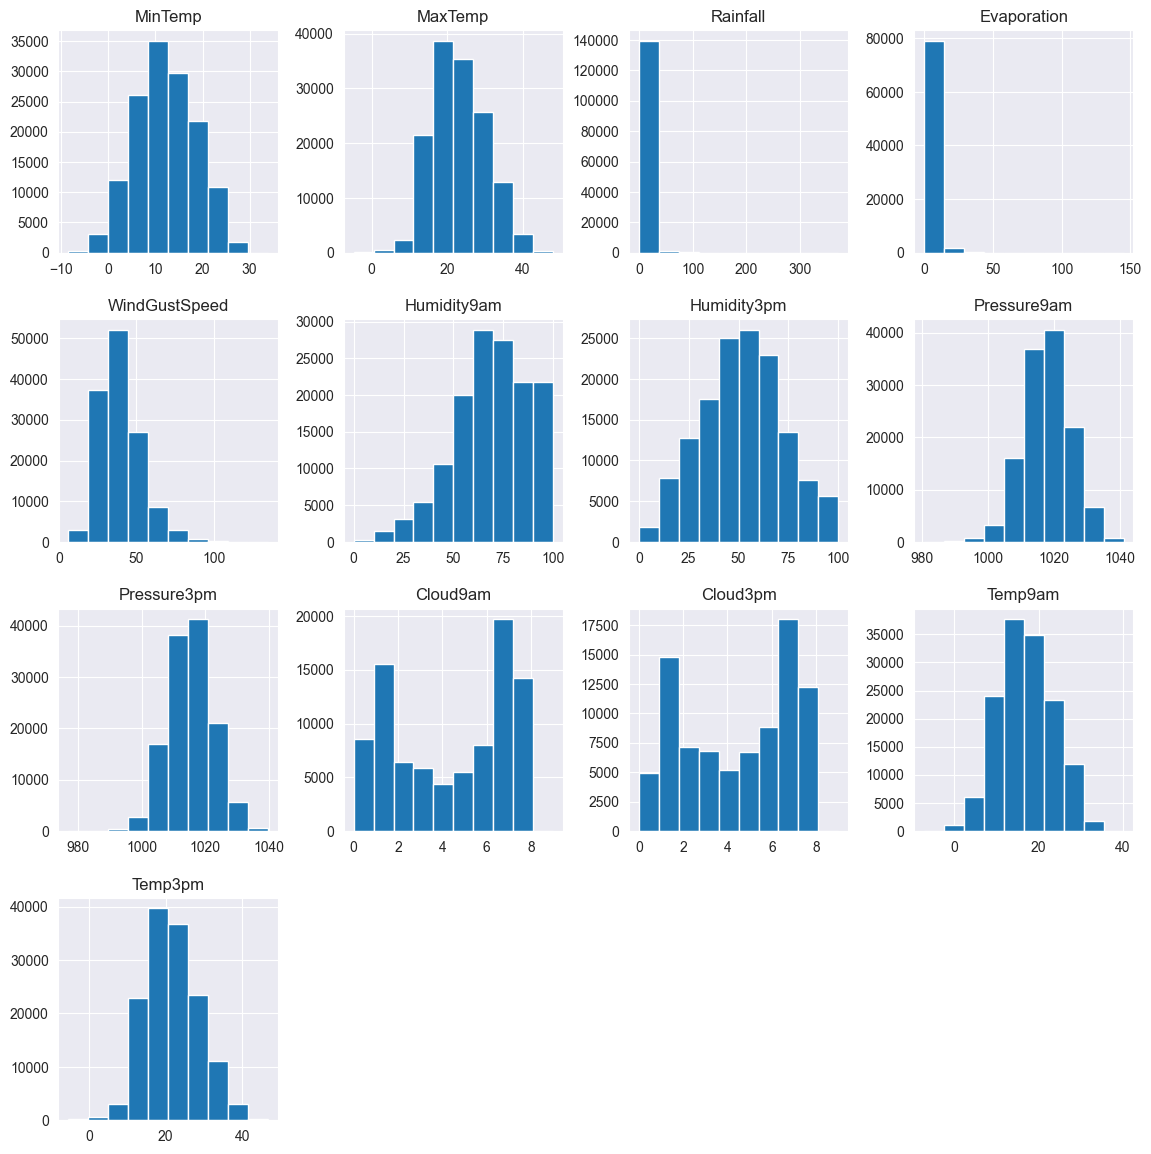

In [33]:
warnings.filterwarnings('ignore')
fig, ax = plt.subplots(figsize=(10, 10))
dataFrameWeather.hist(ax=ax)
plt.subplots_adjust(right=1.2, top=1.2)
plt.show()

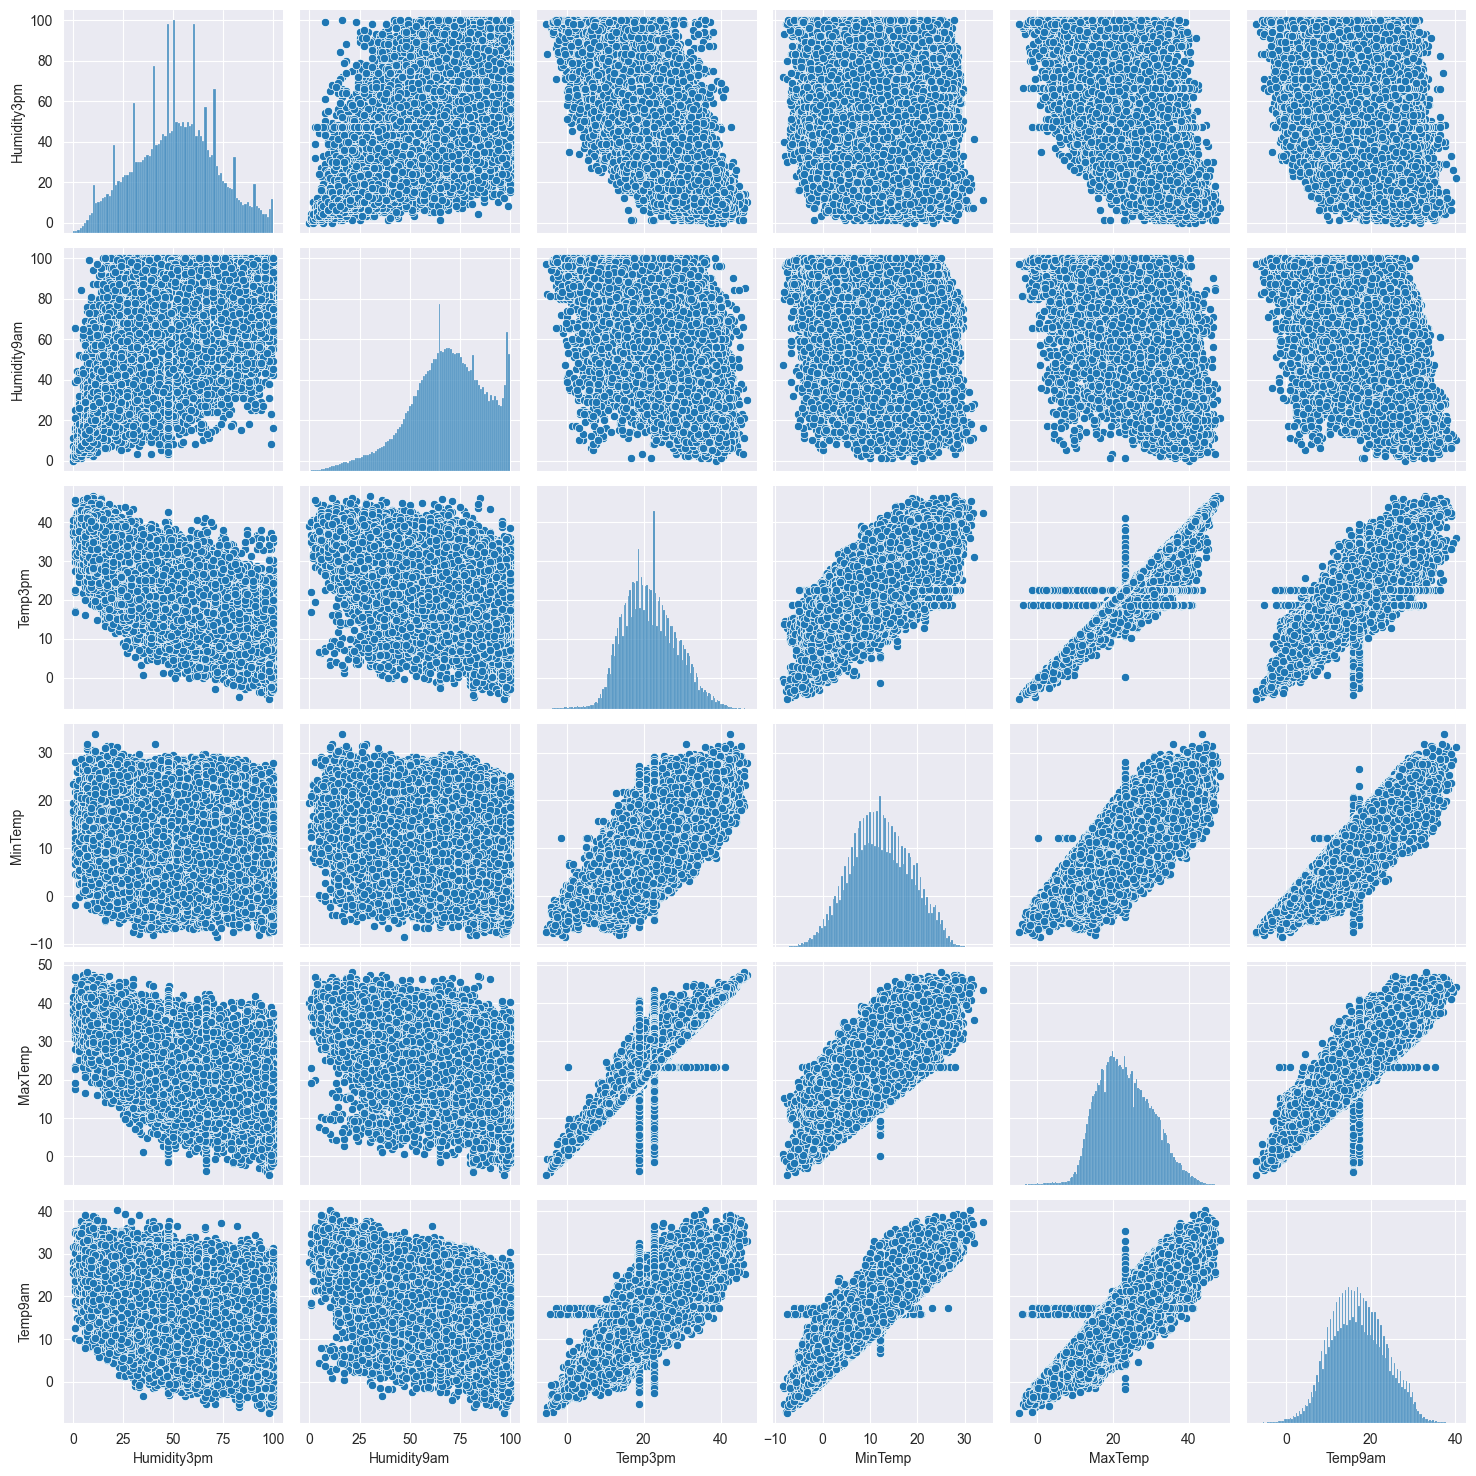

In [34]:
num = ['Humidity3pm', 'Humidity9am', 'Temp3pm', 'MinTemp', 'MaxTemp', 'Temp9am']
sb.pairplot(dataFrameWeather[num], kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()

# Outlier detection

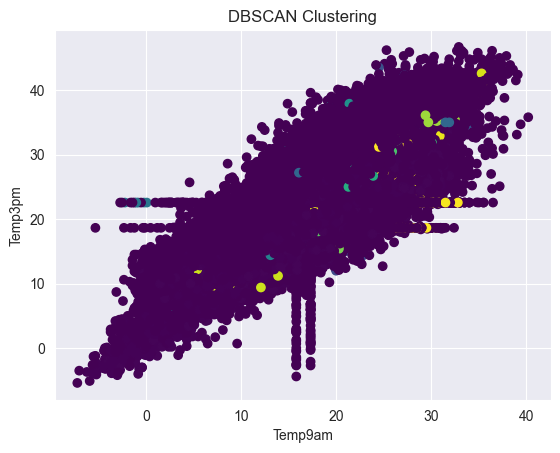

In [35]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

# Create DBSCAN object
dbscan = DBSCAN(eps=1.7, min_samples=4)

# Perform clustering
clusters = dbscan.fit_predict(df_scaled)

# Add the cluster labels to the DataFrame
df_imputed['Cluster'] = clusters
df_imputed[df_imputed['Cluster'] == -1].sum()

#df_no_outliers = df_imputed[clusters != -1]
# Visualize the clusters
plt.scatter(df_imputed['Temp9am'], df_imputed['Temp3pm'], c=df_imputed['Cluster'], cmap='viridis')
plt.xlabel('Temp9am')
plt.ylabel('Temp3pm')
plt.title('DBSCAN Clustering')
plt.show()


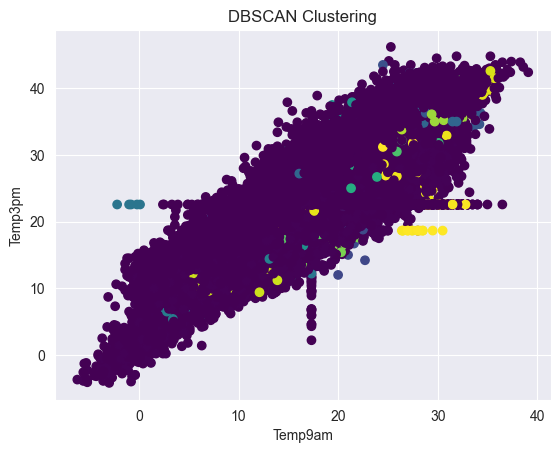

In [36]:
df_imputed = df_imputed[clusters != -1]

plt.scatter(df_imputed['Temp9am'], df_imputed['Temp3pm'], c=df_imputed['Cluster'], cmap='viridis')
plt.xlabel('Temp9am')
plt.ylabel('Temp3pm')
plt.title('DBSCAN Clustering')
plt.show()

In [37]:
df_imputed = df_imputed.drop(columns=['Cluster'], axis=1)

# Correlazione e importanza delle features
Plotto la matrice di correlazione servendoci di una heatmap per capire il grado di correlazione tra i vari dati

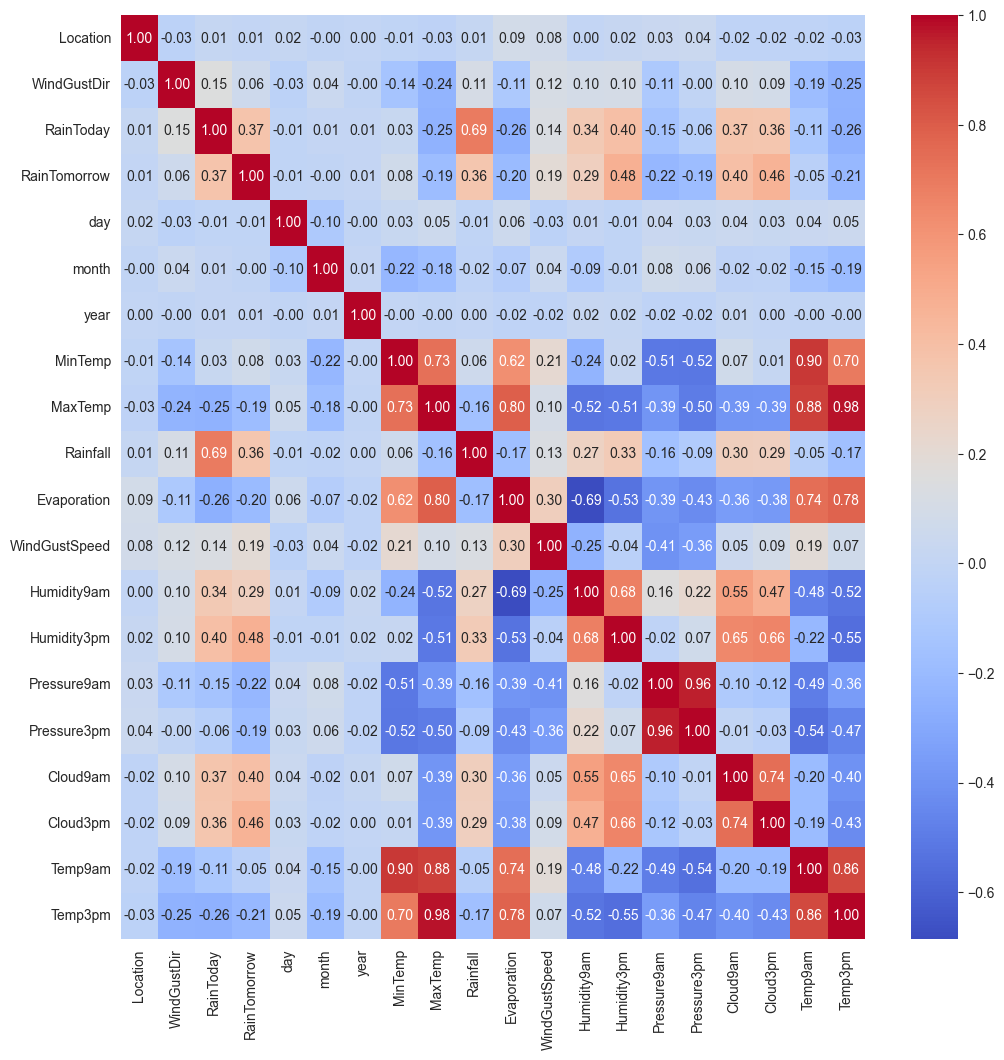

In [38]:
#creo la matrice di correlazione
matr_corr = df_imputed.corr()

#stampo la matrice di correlazione
plt.figure(figsize=(12,12))
sb.heatmap(matr_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Da una veloce analisi della matrice di correlazione possiamo notare come alcuni attributi sono bassamente correlati agli altri. Questo ci permette di dropparli senza problemi così da ridurre il numero di features da tenere in considerazione

Andiamo adesso a studiare l'importanza delle feature. Sappiamo di voler fare predizione sull'attributo 'RainTomorrow', andiamo quindi a creare un RandomForest che ci permetterà di capire quali sono gli attributi più importanti a riguardo.

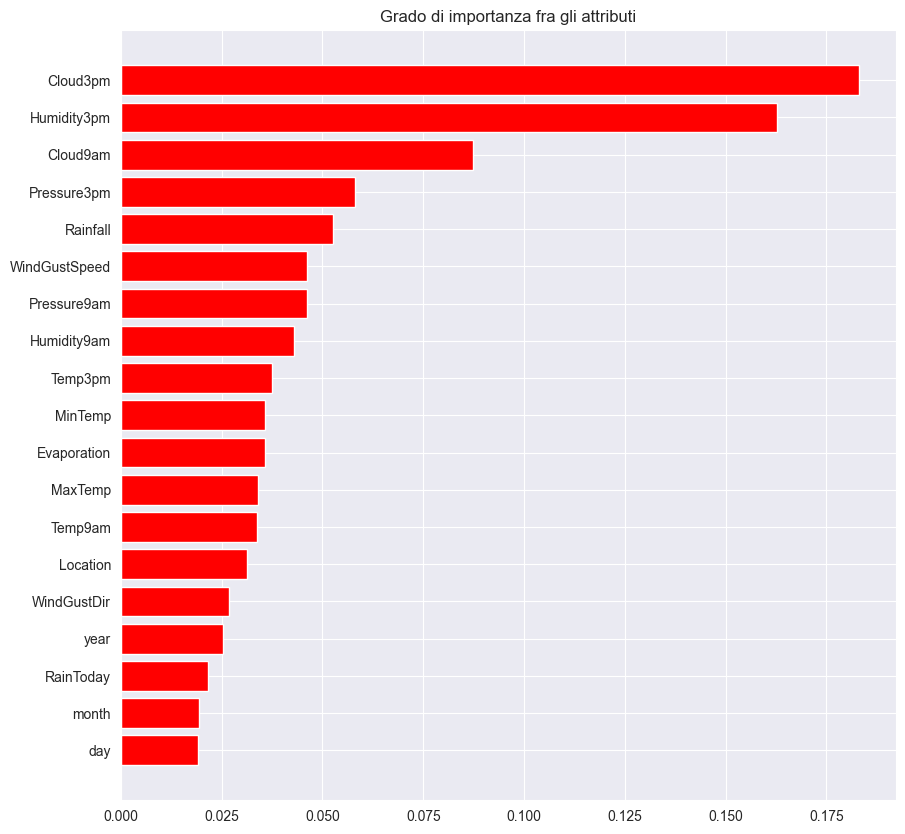

In [39]:
df_X = df_imputed.drop(['RainTomorrow'], axis=1)
df_Y = df_imputed['RainTomorrow']

forest = RandomForestClassifier()
forest.fit(df_X, df_Y)

attributi= df_X.columns
importances= forest.feature_importances_ #grado di importanza fra gli attributi
index= np.argsort(importances) #mappa ogni grado di importanza con l'attributo corrispondente

plt.figure(figsize=(10,10))
plt.title('Grado di importanza fra gli attributi')
plt.barh(range(len(index)),importances[index],color='r',align='center')
plt.yticks(range(len(index)),attributi[index])
plt.show()

In [40]:
df_imputed.shape

(107145, 20)

In [41]:
df_imputed.drop(['day', 'month', 'year', 'Location', 'WindGustDir', 'Temp9am', 'MinTemp'], axis=1)

,RainToday,RainTomorrow,MaxTemp,Rainfall,Evaporation,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm
1,0,0,25.1,0.0,6.242761,44.0,44.0,25.0,1010.6,1007.8,1.776385,2.605029,24.3
2,0,0,25.7,0.0,8.273388,46.0,38.0,30.0,1007.6,1008.7,2.037233,2.000000,23.2
3,0,0,28.0,0.0,6.242160,24.0,45.0,16.0,1017.6,1012.8,1.371820,2.029181,26.5
5,0,0,29.7,0.2,7.845996,56.0,55.0,23.0,1009.2,1005.4,3.018157,2.790305,28.9
6,0,0,25.0,0.0,7.791964,50.0,49.0,19.0,1009.6,1008.2,1.000000,1.831301,24.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140782,0,0,21.8,0.0,5.301208,31.0,59.0,27.0,1024.7,1021.2,2.574186,2.859711,20.9
140783,0,0,23.4,0.0,5.794565,31.0,51.0,24.0,1024.6,1020.3,1.809039,2.504704,22.4
140784,0,0,25.3,0.0,5.885369,22.0,56.0,21.0,1023.5,1019.1,1.663488,2.125562,24.5
140785,0,0,26.9,0.0,6.959350,37.0,53.0,24.0,1021.0,1016.8,1.944675,2.446405,26.1


# Campionamento
Visto l'elevatissimo numero di tuple si decide di fare campionamento sul dataframe così da poter lavorare con un numero di tuple minore

In [42]:
#df_balanced_sampled = df_imputed.sample(n = 100110, random_state=35) #n e random_state sono dei numeri generati casualmente
df_balanced_sampled = df_imputed.copy()

In [43]:
df_balanced_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107145 entries, 1 to 140786
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       107145 non-null  int32  
 1   WindGustDir    107145 non-null  int32  
 2   RainToday      107145 non-null  int32  
 3   RainTomorrow   107145 non-null  int32  
 4   day            107145 non-null  int32  
 5   month          107145 non-null  int32  
 6   year           107145 non-null  int32  
 7   MinTemp        107145 non-null  float64
 8   MaxTemp        107145 non-null  float64
 9   Rainfall       107145 non-null  float64
 10  Evaporation    107145 non-null  float64
 11  WindGustSpeed  107145 non-null  float64
 12  Humidity9am    107145 non-null  float64
 13  Humidity3pm    107145 non-null  float64
 14  Pressure9am    107145 non-null  float64
 15  Pressure3pm    107145 non-null  float64
 16  Cloud9am       107145 non-null  float64
 17  Cloud3pm       107145 non-nul

In [44]:
df_balanced_sampled.shape

(107145, 20)

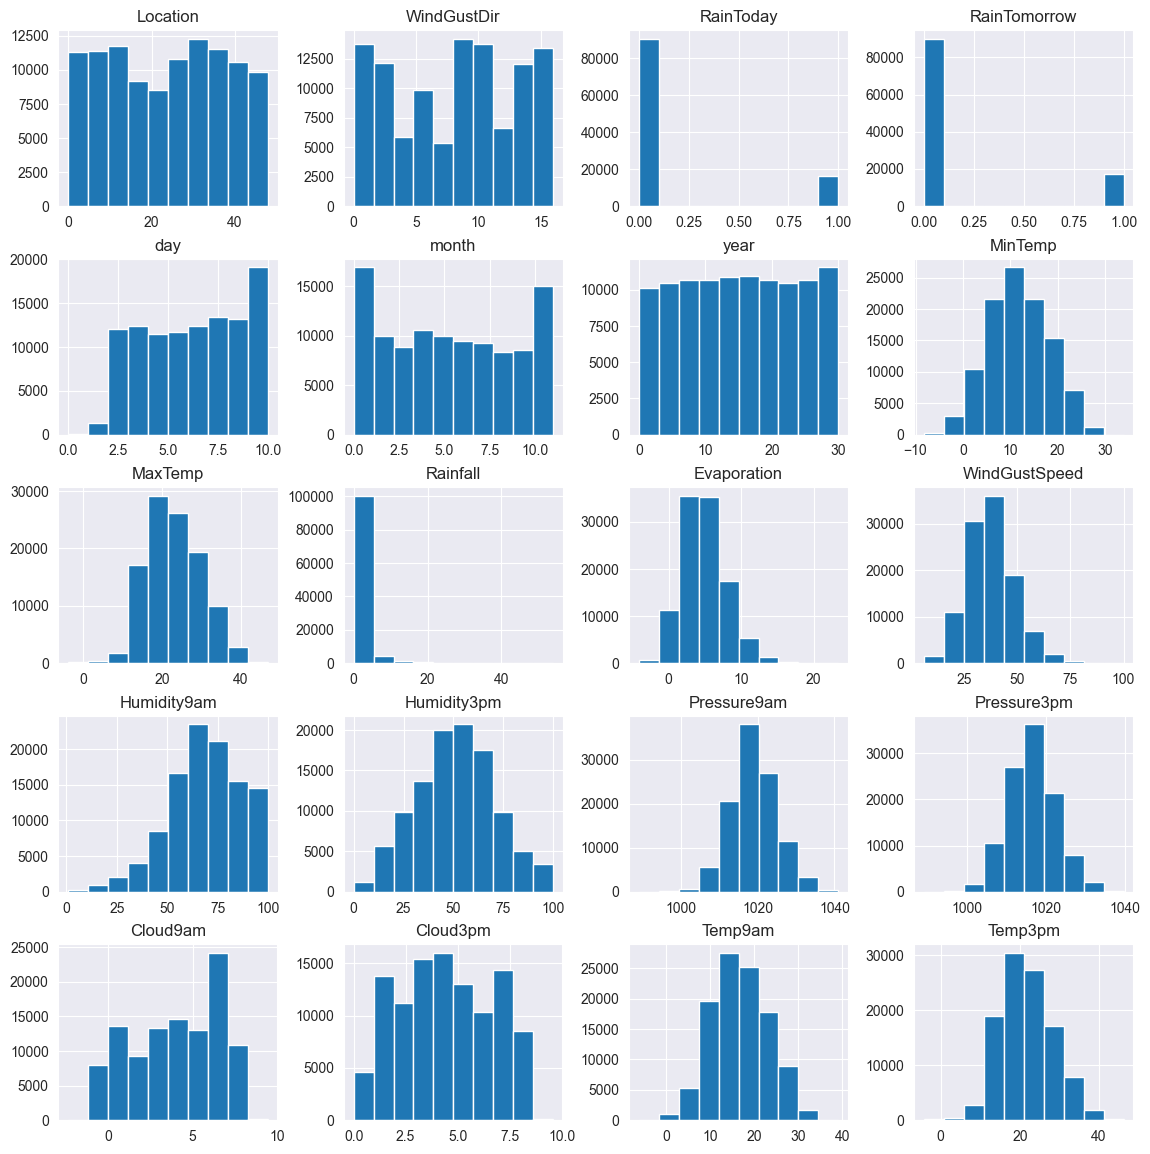

In [45]:
warnings.filterwarnings('ignore')
fig, ax = plt.subplots(figsize=(10, 10))
df_balanced_sampled.hist(ax=ax)
plt.subplots_adjust(right=1.2, top=1.2)
plt.show()

# Bilanciamento del dataset

Per poter proseguire con i primi classificatori bisogna prima bilanciare il dataset. In particolare l'attributo 'RainTomorrow' sulla quale bisogna fare predizione risulta essere molto sbilanciato da come si può vedere dal grafico sottostante

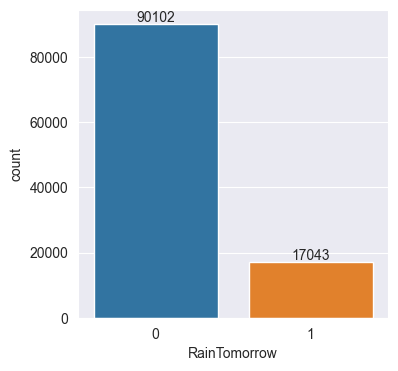

In [46]:
plt.figure(figsize=(4, 4))
ax = sb.countplot(x=df_imputed['RainTomorrow'])
plt.bar_label(ax.containers[0])
plt.show()

Ciò che verrà fatto è quello di utilizzare il sampling, in particolare verrà fatto oversampling sui dati per bilanciarli

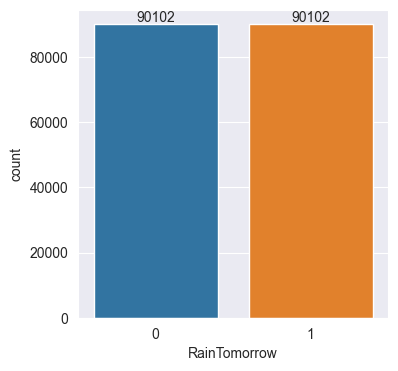

In [47]:
X = df_balanced_sampled.drop(['RainTomorrow'], axis=1)
y = df_balanced_sampled['RainTomorrow']

#Utilizzo lo smote per fare oversampling e aumentare il numero di istanze 'RainTomorrow' = 'Yes' (1)
smote = SMOTE(random_state=35)
X_smoted, y_smoted = smote.fit_resample(X,y)
df_balanced = pd.concat([X_smoted, y_smoted],axis=1)

plt.figure(figsize=(4, 4))
ax = sb.countplot(x=df_balanced['RainTomorrow'])
plt.bar_label(ax.containers[0])
plt.show()

In [48]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180204 entries, 0 to 180203
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       180204 non-null  int32  
 1   WindGustDir    180204 non-null  int32  
 2   RainToday      180204 non-null  int32  
 3   day            180204 non-null  int32  
 4   month          180204 non-null  int32  
 5   year           180204 non-null  int32  
 6   MinTemp        180204 non-null  float64
 7   MaxTemp        180204 non-null  float64
 8   Rainfall       180204 non-null  float64
 9   Evaporation    180204 non-null  float64
 10  WindGustSpeed  180204 non-null  float64
 11  Humidity9am    180204 non-null  float64
 12  Humidity3pm    180204 non-null  float64
 13  Pressure9am    180204 non-null  float64
 14  Pressure3pm    180204 non-null  float64
 15  Cloud9am       180204 non-null  float64
 16  Cloud3pm       180204 non-null  float64
 17  Temp9am        180204 non-nul

Salvo il dataframe in un file .csv

In [49]:
df_balanced.to_csv('df_final.csv', index=False)

# Metriche per la valutazione dei risultati

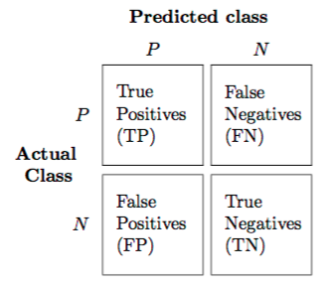

In [50]:
image = 'confusion_matrix.png'
Image(filename=os.path.join(image),width=300)

Per introdurre le metriche che verranno utilizzate durante le analisi dobbiamo fare riferimento alla matrice di confusione. Questa è una matrice quadrata in cui le righe sono i valori corretti della classe mentre le colonne sono i valori predetti dal modello per la classe. Un problema di classificazione binaria presenta la seguente matrice di confusione


A questo punto possiamo definire le metriche come segue:
* Accuracy (accuratezza):
  L'Accuracy rappresenta la percentuale di previsioni corrette rispetto al totale delle istanze valutate. È una misura di quanto il modello sia in grado di classificare correttamente gli esempi.

* Error Rate (tasso di errore):
  L'Error Rate è la misura complementare all'Accuracy e rappresenta la percentuale di previsioni errate rispetto al totale delle istanze valutate. Indica la percentuale di errori compiuti dal modello di classificazione.

* Precision (precisione):
  La Precision rappresenta la percentuale di previsioni positive corrette rispetto al totale delle previsioni positive effettuate dal modello. Misura l'accuratezza delle previsioni positive e fornisce un'indicazione sulla proporzione di elementi correttamente identificati come positivi rispetto al numero totale di elementi identificati come positivi.

* Recall (richiamo):
  La Recall rappresenta la percentuale di previsioni positive corrette rispetto al totale dei veri positivi e dei falsi negativi. Misura la capacità del modello di individuare correttamente gli elementi positivi, considerando sia i veri positivi (elementi correttamente classificati come positivi) che i falsi negativi (elementi erroneamente classificati come negativi).

* F-measure (misura F):
  L'F-measure rappresenta la media armonica tra Precision e Recall. È una misura che tiene conto sia della precisione che del richiamo del modello. L'F-measure fornisce un singolo valore che combina queste due misure, consentendo di valutare complessivamente le prestazioni del modello.

Per calcolare queste metriche, è necessario utilizzare i valori corrispondenti dalla matrice di confusione (TP, TN, FP, FN). Ogni metrica ha una formula specifica per il calcolo basata su questi valori.

Calcolate nel seguente modo.


\begin{align*}
\text{Accuracy} &= \frac{TP + TN}{TP + TN + FP + FN} \\
\text{Error Rate} &= \frac{FP + FN}{TP + TN + FP + FN} \\
\text{Precision} &= \frac{TP}{TP + FP} \\
\text{Recall} &= \frac{TP}{TP + FN} \\
\text{F1-Score} &= 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
\end{align*}


Vediamo la curva di **AUC-ROC**

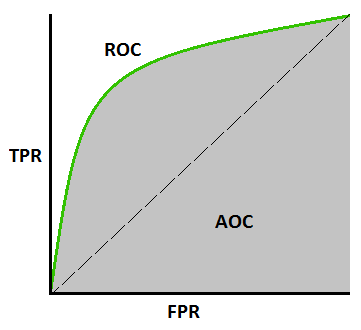

In [51]:
image2 = 'auc-roc.png'
Image(filename=os.path.join(image2),width=350)

\begin{align*}
\text{Sensitivity} &= \text{Recall} = \frac{TP}{TP + FN} \\
\text{Specificity} &= \frac{TN}{TN + FP} \\
\text{False Positive Rate} &= 1 - \text{Specificity} = \frac{FP}{TN + FP} \\
\end{align*}


La curva ROC (Receiver Operating Characteristic) è un grafico utilizzato per valutare le prestazioni di un modello di classificazione binaria. Mostra come variano il tasso di veri positivi (TPR) e il tasso di falsi positivi (FPR) al variare della soglia di classificazione del modello.

Nella curva ROC, l'asse verticale rappresenta la capacità del modello di individuare correttamente gli esempi positivi (TPR). Più il TPR è alto, migliore è il modello nell'identificare correttamente gli esempi positivi.

L'asse orizzontale rappresenta la proporzione di esempi negativi erroneamente classificati come positivi (FPR). Più il FPR è basso, migliore è il modello nel limitare gli errori di classificazione degli esempi negativi.

La curva ROC viene generata variando la soglia di classificazione del modello. Per ogni soglia, vengono calcolati il TPR e il FPR corrispondenti. Ogni punto sulla curva rappresenta una combinazione di TPR e FPR a una specifica soglia.

Definisco a questo punto dei dataframe utili per il salvataggio dei dati

In [52]:
# data frame per risultati dei modelli per la cross-validation
results= pd.DataFrame(columns=['NomeModello','Accuracy','ErrorRate','Precision','Recall','F-score','Time'])

In [53]:
def valuta_performance(nomeModello, modello, X, y, data,temp):
    indici = data[data['NomeModello'] == nomeModello].index
    for j in range(len(indici)):
        data.drop(indici[j], inplace = True)
    accuracy = cross_val_score(modello, X ,y, cv=10 ,scoring="accuracy").mean()
    error = (1-accuracy)
    precision = cross_val_score(modello, X ,y, cv=10 ,scoring="average_precision").mean()
    recall = cross_val_score(modello, X ,y, cv=10 ,scoring="recall_micro").mean()
    f_score = cross_val_score(modello, X ,y, cv=10 ,scoring="f1_micro").mean()

    row = pd.DataFrame({'NomeModello': [nomeModello],
                        'Accuracy': [accuracy],
                        'ErrorRate': [error],
                        'Precision': [precision],
                        'Recall': [recall],
                        'F-score': [f_score],
                        'Time': [temp]})

    data = pd.concat([data, row], ignore_index=True)

    return data

In [54]:
# dataframe utili per il plotting delle performance dei classificatori
models=["Albero_Decisionale", "Naive_Bayes", "LogReg", "KNN"]
results_test= pd.DataFrame(index=models,columns=["accuracy","balanced_accuracy","precision","w_precision","recall","w_recall","f1"])
results_train= pd.DataFrame(index=models,columns=["accuracy","balanced_accuracy","precision","w_precision","recall","w_recall","f1"])

In [55]:
# dataframe specifico per le ANN
models_neural=["ANN","MLP"]
results_test_neural= pd.DataFrame(index=models_neural,columns=["accuracy","balanced_accuracy","precision","w_precision","recall","w_recall","f1"])

In [56]:
# funzione per salvare gli score dei relativi modelli
def set_scores(df,model,label,predicted):
    df.loc[model]["f1"]=f1_score(label, predicted)
    df.loc[model]["accuracy"]=accuracy_score(label, predicted)
    df.loc[model]["recall"]=recall_score(label, predicted)
    df.loc[model]["precision"]=precision_score(label, predicted)
    df.loc[model]["balanced_accuracy"]=balanced_accuracy_score(label, predicted)
    df.loc[model]["w_recall"]=recall_score(label, predicted,average='weighted')
    df.loc[model]["w_precision"]=precision_score(label, predicted,average='weighted')

In [57]:
# Lista degli score per la ROC
lista_predizioni = []

# Classificatori

In [58]:
df_final = pd.read_csv('df_final.csv')

Finito il lavoro di pulizia, bilanciamento ed esplorazione del dataset si può passare alla fase di training dei classificatori. Dividiamo il dataset in **training_set** e **test_set**
* training_set utilizzato per costruire il modello che sarà formato dai 2/3 ddel dataset
* test_set, utilizzato per testare le performance del modello e sarà composto dalla restante parte del dataset

In [59]:
#Divido il dataset in test_set e training_set
df_X = df_final.drop('RainTomorrow', axis=1)
df_y = df_final['RainTomorrow']

X_train,X_test,y_train,y_test = train_test_split(df_X, df_y, test_size=.33, random_state=42)
y_train = y_train.values.ravel()

# Albero Decisionale
Un albero decisionale (o decision tree) è una struttura di dati ad albero utilizzata per prendere decisioni o fare previsioni in base a una serie di condizioni o attributi.
Può essere utilizzato per classificare esempi in diverse categorie o per stimare valori numerici (regressione). Gli alberi decisionali possono anche essere utilizzati per la selezione delle caratteristiche, l'individuazione di outlier e altre attività di analisi dei dati.

### Risultati sul training set

In [60]:
start = time.time()
albero = DecisionTreeClassifier(random_state=42)
albero = albero.fit(X_train, y_train)
stop = time.time()-start

In [61]:
result = valuta_performance('Albero Decisionale', albero, X_train, y_train, results, stop)

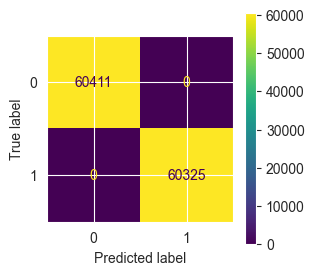

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     60411
           1       1.00      1.00      1.00     60325

    accuracy                           1.00    120736
   macro avg       1.00      1.00      1.00    120736
weighted avg       1.00      1.00      1.00    120736



In [62]:
y_pred_train_albero = albero.predict(X_train)
confusion_matrix = metrics.confusion_matrix(y_train,y_pred_train_albero)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
fig, ax = plt.subplots(figsize=(3, 3))
cm_display.plot(ax=ax, values_format='d')
plt.show()

print(classification_report(y_train, y_pred_train_albero))

In [63]:
set_scores(results_train, "Albero_Decisionale", y_train, y_pred_train_albero)

### Risultati sul test set

In [64]:
y_pred_test_albero=albero.predict(X_test)
lista_predizioni.append(y_pred_test_albero)

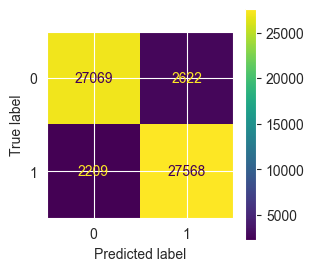

              precision    recall  f1-score   support

           0       0.92      0.91      0.92     29691
           1       0.91      0.93      0.92     29777

    accuracy                           0.92     59468
   macro avg       0.92      0.92      0.92     59468
weighted avg       0.92      0.92      0.92     59468



In [65]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred_test_albero)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
fig, ax = plt.subplots(figsize=(3, 3))
cm_display.plot(ax=ax, values_format='d')
plt.show()

print(classification_report(y_test, y_pred_test_albero))

In [66]:
set_scores(results_test, "Albero_Decisionale", y_test, y_pred_test_albero)

In [108]:
print("max_features: ", albero.max_features_)
print("max_depth: ", albero.tree_.max_depth)
print("min_samples_split: ", albero.min_samples_split)
print("min_samples_leaf: ", albero.min_samples_leaf)

max_features:  19
max_depth:  31
min_samples_split:  2
min_samples_leaf:  1


# Albero decisionale (GridSearchCV)

In [114]:
albero_grid_search = DecisionTreeClassifier()

grid = {'max_features': ['sqrt', 'log2'],
        'max_depth': [33, 34, 35, 36],
        'min_samples_split': [2, 4, 5, 8, 10],
        'min_samples_leaf': [2, 3, 5, 8],
        'criterion':['gini','entropy'],
        'splitter':['best','random'],
       }

grid_search = GridSearchCV(
                estimator=albero_grid_search,
                param_grid=grid,
                cv=10,
                scoring="recall", #ci interessa la recall rispetto alla precision
                n_jobs=-1)

grid_search_result = grid_search.fit(X_train, y_train)

albero_grid_search = grid_search.best_estimator_
print(albero_grid_search)

DecisionTreeClassifier(criterion='entropy', max_depth=34, max_features='sqrt',
                       min_samples_leaf=3, min_samples_split=4)


#### Risultati Train Set

In [116]:
y_pred_train_albero_grid_search = albero_grid_search.predict(X_train)

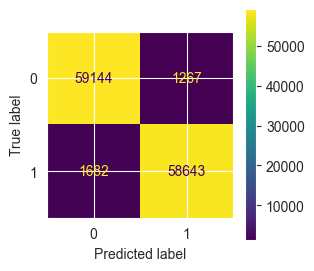

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     60411
           1       0.98      0.97      0.98     60325

    accuracy                           0.98    120736
   macro avg       0.98      0.98      0.98    120736
weighted avg       0.98      0.98      0.98    120736



In [117]:
confusion_matrix = metrics.confusion_matrix(y_train,y_pred_train_albero_grid_search)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
fig, ax = plt.subplots(figsize=(3, 3))
cm_display.plot(ax=ax, values_format='d')
plt.show()

print(classification_report(y_train, y_pred_train_albero_grid_search))

#### Risultati Test set

In [118]:
y_pred_test_albero_grid_search = albero_grid_search.predict(X_test)

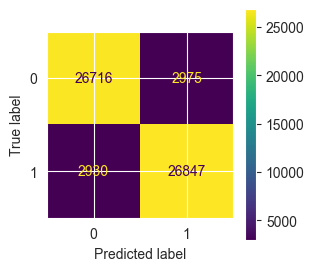

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     29691
           1       0.90      0.90      0.90     29777

    accuracy                           0.90     59468
   macro avg       0.90      0.90      0.90     59468
weighted avg       0.90      0.90      0.90     59468



In [119]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred_test_albero_grid_search)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
fig, ax = plt.subplots(figsize=(3, 3))
cm_display.plot(ax=ax, values_format='d')
plt.show()

print(classification_report(y_test, y_pred_test_albero_grid_search))

# Naive Bayes

Il classificatore di Bayes, o classificatore bayesiano, è un algoritmo di apprendimento automatico che si basa sul teorema di Bayes per effettuare la classificazione di oggetti in diverse categorie. Questo classificatore assume che la presenza di una caratteristica specifica in un oggetto sia indipendente dalle altre caratteristiche dell'oggetto. Il classificatore di Bayes calcola le probabilità per ogni classe e assegna l'oggetto alla classe con la probabilità più alta. Ciò richiede la stima delle probabilità a priori delle classi e la stima delle probabilità condizionate delle caratteristiche date le classi.

Il classificatore di Bayes può essere un potente strumento di classificazione, ma la sua accuratezza dipende dall'assunzione di indipendenza delle caratteristiche e dalla correttezza delle probabilità a priori stimate.

In [67]:
start = time.time()
nb = GaussianNB()
nb = nb.fit(X_train, y_train)
stop = time.time() - start

In [68]:
results = valuta_performance("Naive Bayes Gaussian", nb, X_train, y_train, results, stop)

### Risultati Train set

In [69]:
y_pred_train_bayes = nb.predict(X_train)

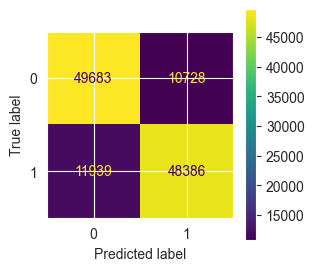

              precision    recall  f1-score   support

           0       0.81      0.82      0.81     60411
           1       0.82      0.80      0.81     60325

    accuracy                           0.81    120736
   macro avg       0.81      0.81      0.81    120736
weighted avg       0.81      0.81      0.81    120736



In [70]:
confusion_matrix = metrics.confusion_matrix(y_train,y_pred_train_bayes)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
fig, ax = plt.subplots(figsize=(3, 3))
cm_display.plot(ax=ax, values_format='d')
plt.show()

print(classification_report(y_train, y_pred_train_bayes))

In [71]:
set_scores(results_train,"Naive_Bayes", y_train, y_pred_train_bayes)

### Risultati Test set

In [72]:
y_pred_test_bayes = nb.predict(X_test)
lista_predizioni.append(y_pred_test_bayes)

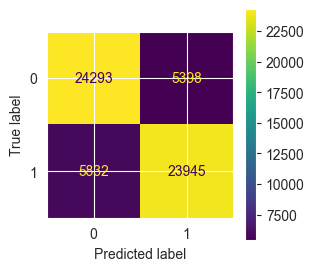

              precision    recall  f1-score   support

           0       0.81      0.82      0.81     29691
           1       0.82      0.80      0.81     29777

    accuracy                           0.81     59468
   macro avg       0.81      0.81      0.81     59468
weighted avg       0.81      0.81      0.81     59468



In [73]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred_test_bayes)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
fig, ax = plt.subplots(figsize=(3, 3))
cm_display.plot(ax=ax, values_format='d')
plt.show()

print(classification_report(y_test, y_pred_test_bayes))

In [74]:
set_scores(results_test, "Naive_Bayes", y_test, y_pred_test_bayes)

# Logistic Regression

La regressione logistica è un algoritmo di apprendimento automatico utilizzato per affrontare problemi di classificazione binaria o multi-classe. A differenza della regressione lineare, che si occupa di predire un valore numerico continuo, la regressione logistica predice la probabilità che un'istanza appartenga a una determinata classe.

La regressione logistica si basa sulla funzione logistica, anche nota come funzione sigmoide, che mappa un valore reale in un intervallo compreso tra 0 e 1. La funzione sigmoide è definita come:

### Risultati sul Train set

In [75]:
start= time.time()
logreg = LogisticRegression(random_state=42,max_iter=5000) #aumento iterazioni per la convergenza dell'algoritmo
logreg = logreg.fit(X_train, y_train)
stop= time.time()-start

In [76]:
results= valuta_performance('Logistic Regression', logreg, X_train, y_train, results, stop)

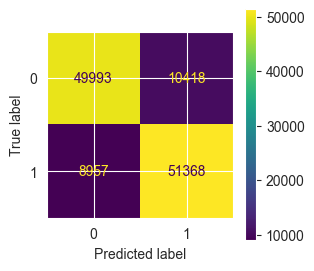

              precision    recall  f1-score   support

           0       0.85      0.83      0.84     60411
           1       0.83      0.85      0.84     60325

    accuracy                           0.84    120736
   macro avg       0.84      0.84      0.84    120736
weighted avg       0.84      0.84      0.84    120736



In [77]:
y_pred_train_logreg = logreg.predict(X_train)
confusion_matrix = metrics.confusion_matrix(y_train,y_pred_train_logreg)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
fig, ax = plt.subplots(figsize=(3, 3))
cm_display.plot(ax=ax, values_format='d')
plt.show()

print(classification_report(y_train, y_pred_train_logreg))

In [78]:
set_scores(results_train, 'LogReg', y_train, y_pred_train_logreg)

### Risultati Test set

In [79]:
y_pred_test_logreg = logreg.predict(X_test)
lista_predizioni.append(y_pred_test_logreg)

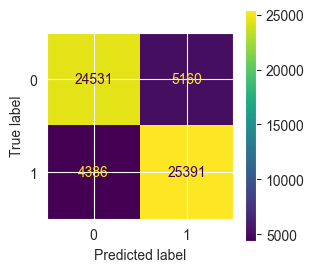

              precision    recall  f1-score   support

           0       0.85      0.83      0.84     29691
           1       0.83      0.85      0.84     29777

    accuracy                           0.84     59468
   macro avg       0.84      0.84      0.84     59468
weighted avg       0.84      0.84      0.84     59468



In [80]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred_test_logreg)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
fig, ax = plt.subplots(figsize=(3, 3))
cm_display.plot(ax=ax, values_format='d')
plt.show()

print(classification_report(y_test, y_pred_test_logreg))

In [81]:
set_scores(results_test, "LogReg", y_test, y_pred_test_logreg)

# K Nearest Neighbors

K-nearest neighbors (K-NN) è un algoritmo di apprendimento automatico utilizzato per la classificazione e la regressione. L'idea principale di K-NN è che gli oggetti che sono "vicini" l'uno all'altro nello spazio delle caratteristiche condividono spesso la stessa etichetta di classe o valore di output.

In [82]:
start= time.time()
Knn = KNeighborsClassifier(n_neighbors=5)
Knn = Knn.fit(X_train,y_train)
stop= time.time()-start

In [83]:
import warnings
warnings.filterwarnings('ignore')
results= valuta_performance('KNN classifier', Knn, X_train, y_train, results,stop)

Uso K-nearest Neighbors con n_neighbors = 5, che è il lvalore utilizzato di default

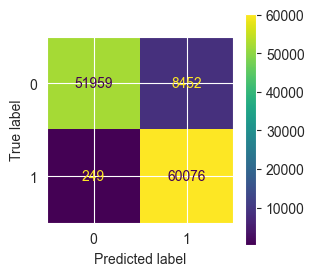

              precision    recall  f1-score   support

           0       1.00      0.86      0.92     60411
           1       0.88      1.00      0.93     60325

    accuracy                           0.93    120736
   macro avg       0.94      0.93      0.93    120736
weighted avg       0.94      0.93      0.93    120736



In [84]:
y_pred_train_Knn = Knn.predict(X_train)
lista_predizioni.append(y_pred_train_Knn)
confusion_matrix = metrics.confusion_matrix(y_train,y_pred_train_Knn)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
fig, ax = plt.subplots(figsize=(3, 3))
cm_display.plot(ax=ax, values_format='d')
plt.show()

print(classification_report(y_train, y_pred_train_Knn))

In [85]:
set_scores(results_train, "KNN", y_train, y_pred_train_Knn)

### Risultati Test Set

In [86]:
y_pred_test_Knn = Knn.predict(X_test)

In [87]:
#lista_predizioni.append(y_pred_test_Knn)

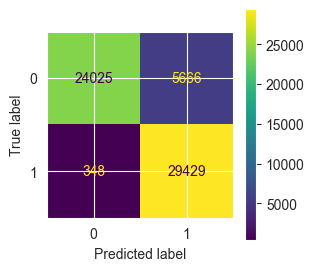

              precision    recall  f1-score   support

           0       0.99      0.81      0.89     29691
           1       0.84      0.99      0.91     29777

    accuracy                           0.90     59468
   macro avg       0.91      0.90      0.90     59468
weighted avg       0.91      0.90      0.90     59468



In [88]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred_test_Knn)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
fig, ax = plt.subplots(figsize=(3, 3))
cm_display.plot(ax=ax, values_format='d')
plt.show()

print(classification_report(y_test, y_pred_test_Knn))

In [89]:
set_scores(results_test, "KNN", y_test, y_pred_test_Knn)

# KNN (GridSearchCV)

In [126]:
knn_grid_search = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3,4,5,6,7],
    #'weights': ['uniform', 'distance'],
    #'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [15,16,17,18,19,20,21,22,23,24,25]
}

grid_search = GridSearchCV(
                estimator=knn_grid_search,
                param_grid=param_grid,
                cv=5,
                scoring="recall",
                n_jobs=-1
)

grid_search_result = grid_search.fit(X_train, y_train)

knn_grid_search = grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

KeyboardInterrupt: 

#### Risultati Train Set

# SGD
La discesa stocastica del gradiente (Stochastic Gradient Descent, SGD) è un algoritmo di ottimizzazione. L'obiettivo principale della SGD è minimizzare una funzione di perdita che misura l'errore tra le previsioni del modello e i valori di output desiderati. L'algoritmo fa ciò aggiornando iterativamente i parametri del modello in direzione opposta al gradiente della funzione di perdita rispetto a tali parametri. L'idea alla base della SGD è quella di suddividere il set di dati di addestramento in piccoli sottoinsiemi chiamati batch e di calcolare il gradiente della funzione di perdita sui singoli batch.

In [92]:
start = time.time()
SGD = SGDClassifier(max_iter=5000, random_state=42)
SGD = SGD.fit(X_train, y_train)
stop = time.time() - start

In [93]:
#results = valuta_performance('SGD', SGD, X_train, y_train, results, stop)

 #### Risutlati Train set

In [94]:
y_pred_train_SGD = SGD.predict(X_train)

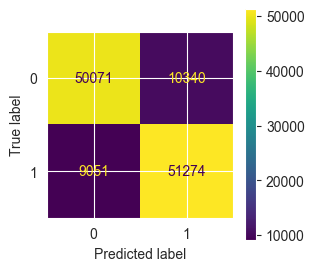

              precision    recall  f1-score   support

           0       0.85      0.83      0.84     60411
           1       0.83      0.85      0.84     60325

    accuracy                           0.84    120736
   macro avg       0.84      0.84      0.84    120736
weighted avg       0.84      0.84      0.84    120736



In [95]:
confusion_matrix = metrics.confusion_matrix(y_train,y_pred_train_SGD)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
fig, ax = plt.subplots(figsize=(3, 3))
cm_display.plot(ax=ax, values_format='d')
plt.show()

print(classification_report(y_train, y_pred_train_SGD))

In [96]:
#set_scores(results_train, "SGD", y_train, y_pred_train_SGD)

#### Risultati Test set

In [97]:
y_pred_test_SGD = SGD.predict(X_test)

In [98]:
lista_predizioni.append(y_pred_test_SGD)

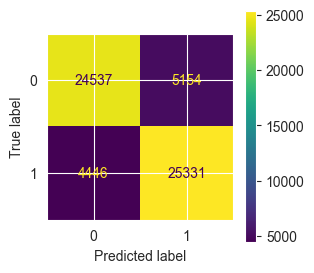

              precision    recall  f1-score   support

           0       0.85      0.83      0.84     29691
           1       0.83      0.85      0.84     29777

    accuracy                           0.84     59468
   macro avg       0.84      0.84      0.84     59468
weighted avg       0.84      0.84      0.84     59468



In [99]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred_test_SGD)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
fig, ax = plt.subplots(figsize=(3, 3))
cm_display.plot(ax=ax, values_format='d')
plt.show()

print(classification_report(y_test, y_pred_test_SGD))

In [100]:
#set_scores(results_test, "SGD", y_test, y_pred_test_SGD)

# Classificatori Ensemble


# Random Forest

In [101]:
forest = RandomForestClassifier()
forest = forest.fit(X_train,y_train)

### Risultati Train set

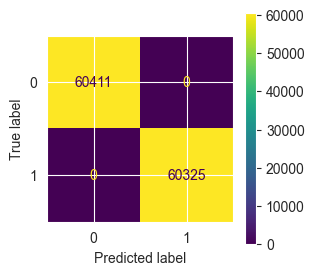

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     60411
           1       1.00      1.00      1.00     60325

    accuracy                           1.00    120736
   macro avg       1.00      1.00      1.00    120736
weighted avg       1.00      1.00      1.00    120736



In [104]:
y_pred_train_forest = forest.predict(X_train)
lista_predizioni.append(y_pred_train_forest)
confusion_matrix = metrics.confusion_matrix(y_train,y_pred_train_forest)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
fig, ax = plt.subplots(figsize=(3, 3))
cm_display.plot(ax=ax, values_format='d')
plt.show()

print(classification_report(y_train, y_pred_train_forest))

In [105]:
#set_scores((results_train, "Random_Forest", y_pred_train_forest))

### Risultati Test set

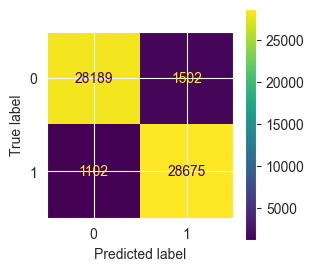

              precision    recall  f1-score   support

           0       0.96      0.95      0.96     29691
           1       0.95      0.96      0.96     29777

    accuracy                           0.96     59468
   macro avg       0.96      0.96      0.96     59468
weighted avg       0.96      0.96      0.96     59468



In [106]:
y_pred_test_forest = forest.predict(X_test)
lista_predizioni.append(y_pred_test_forest)
confusion_matrix = metrics.confusion_matrix(y_test,y_pred_test_forest)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
fig, ax = plt.subplots(figsize=(3, 3))
cm_display.plot(ax=ax, values_format='d')
plt.show()

print(classification_report(y_test, y_pred_test_forest))

In [107]:
#set_scores(results_test, "Random_Forest", y_test, y_pred_test_forest)